In [1]:
from IPython.core.display import display, HTML 

display(HTML("<style>.container { width: 95% !important; }</style>"))

/var/folders/hz/64396th91h3dzdz6q1zhsb1r0000gn/T/ipykernel_3071/11599986.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# 04 - Graphical Causal Models

## 인과에 대해 생각해보기

유튜브 영상에 나오는 요리사들이 얼마나 완벽하게 음식을 묘사하는지 알아차린 적 있나요?
"소스가 벨벳같은 농도가 될 때까지 졸이세요". 당신이 그저 요리를 배우는 중이라면, 이게 뭘 의미하는지 알 수도 없을 겁니다. 잠시 이걸 스토브 위에 둘 시간을 주세요.
인과성에도 마찬가지입니다. 당신이 바(bar)로 걸어들어가서 사람들이 인과성에 대해 이야기한다고 가정해봅시다(아마 경제학과 옆에 있는 바겠죠). 그 경우, 당신은 아마 그들이 '수입의 교란 효과가 이민 효과를 규명하는 것을 어떻게 어렵게 만들었고, 그래서 그들이 도구 변수를 사용해야만 했어야 했는지 듣게 될 겁니다. 그리고 지금쯤 당신은 그들이 뭐라고 하는지 알아듣지 못했을 겁니다. 그러나 제가 당장 최소한 몇 개의 문제는 해결해 줄 수 있어요. 

그래픽 모델은 인과성의 언어입니다. 이것은 다른 용감하고 진실한 인과성의 팬들과 이야기할 때에 쓸 수 있을 뿐 아니라 당신이 자신의 생각을 더 투명하게 만드는 데에도 사용할 수 있죠.

시작점으로서, 예를 들어 잠재적 결과의 조건부 독립을 가정해봅시다. 
이것은 우리가 인과 추론을 할 때에 참으로 만들어야 하는 주요한 가정 중 하나입니다. 

$ (Y_0, Y_1) \perp T | X $

조건부 독립은 결과에 있어서 다른 숨어있는 변수들이 아닌 오직 처치에 의한 효과를 측정할 수 있게 만들어줍니다. 이에 대한 고전적인 예시는 아픈 환자에 대한 약의 효과입니다. 오직 심각하게 아픈 환자들만 약을 먹는다면, 약을 처방하는 것이 환자의 건강을 악화시키는 것으로 보일 수도 있습니다. 그 이유는 병의 심각성이 약의 효과와 섞여버리기 때문이죠. 우리가 환자들을 심각한 케이스와 덜 심각한 케이스로 나누고 각 하위그룹에서의 약의 효과를 분석한다면, 우리는 실제 효과에 대한 더 명확한 그림을 얻을 것입니다. 모집단을 피쳐에 따라 나누는 것을 우리는 'X에 대한 통제' 혹은 'X에 대한 컨디셔닝(조건화?)'이라고 부릅니다. 심각한 케이스에 대해 컨디셔닝함으로써, 처치 메커니즘이 랜덤에 가까워집니다. 심각한 그룹에 속한 환자들은 이 차원에 대해 똑같기 때문에 더 이상 병증의 심각성에 따라서가 아니라 오직 우연에 의해 약을 받거나 받지 않게 됩니다. 그리고 처치가 그룹 내에서 랜덤으로 할당되면, 처치는 잠재적 결과와 조건부 독립이 됩니다. 

독립과 조건부 독립은 인과 추론에서의 핵심입니다. 하지만, 그것을 이해하는 것은 꽤 어려울 수 있습니다. 하지만 이러한 어려움은 우리가 문제를 묘사할 적절한 언어를 이용하면 바뀔 수 있습니다. 이것이 바로 **인과 그래프 모형**이 필요한 때입니다. 인과 그래프 모형은 무엇이 다른 것을 유발하는지로 인과성이 작동하는 방식을 표현하는 방식입니다. 


In [5]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

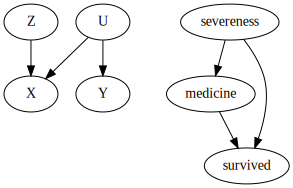

In [6]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")

g

각 노드는 랜덤 변수입니다. 우리는 화살표, 또는 엣지를 사용해서 하나의 변수가 다른 것의 원인임을 나타냅니다. 위에서 첫번째 그래프 모형은 Z가 X를 유발했고 U가 X와 Y를 유발했다고 말하고 있습니다. 더 확실한 예제로, 환자의 생존에 대한 약의 효과에 관한 우리의 생각을 번역해서 두번째 그래프와 같이 나타낼 수 있습니다. 병의 심각성은 약과 생존 모두의 원인이 되고, 약은 생존의 원인이 됩니다. 앞으로 우리가 보게 될 것처럼, 인과 그래프 모형 언어는 우리가 인과성에 대해 더 분명하게 이해하도록 돕고, 세상이 어떻게 작동하는지에 대한 우리의 믿음도 명확하게 만들 것입니다.

## Crash Course in Graphical Models

그래프 모형에 대해서만 다루는 한 학기짜리 강좌도 있습니다. 그러나 우리의 목적에서는 그래프 모형이 수반하는 독립성과 조건부 독립성 가정이 무엇인지에 대해 이해하는 것이 더 중요합니다. 우리가 보게될 것처럼, 물이 개울을 따라 흐르는 것처럼 독립성은 그래프 모형을 따라 흐릅니다. 우리는 우리가 그 안에 속한 변수를 어떻게 다루느냐에 따라 이 흐름을 멈추거나 계속되게 만들 수 있습니다. 이를 이해하기 위해, 몇 개의 흔한 그래프 구조와 예시를 살펴볼 것입니다. 그들은 매우 직관적이지만, 그래프 모형의 독립과 조건부 독립에 대한 이해를 쌓아올리기에는 충분할 것입니다. 

먼저, 이 매우 단순한 그래프를 봅시다. A가 B의 원인이고, B가 C의 원이이 됩니다. 혹은 Z의 원인인 Y의 원인이 X입니다. 

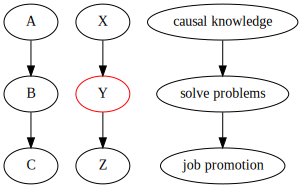

In [7]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", color="red")

g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

첫번째 그래프에서, 의존성이 화살표의 방향을 따라서 흐릅니다. 덜 직관적이지만 의존성이 대칭적인 것을 눈여겨 보세요. 더 확실한 예제로, 우리가 비즈니스 문제를 풀기 위한 유일한 방법이 인과 추론이고, 이 문제들을 푸는 게 승진하는 유일한 길이라고 해봅시다. 즉 인과 지식(을 가지고 있는 것)이 승진에 영향을 미치는 문제를 푸는 것을 함축합니다. 인과적 전문성이 클수록 당신이 승진할 가능성은 더 커집니다. 또한, 당신의 승진 가능성이 클수록 당신이 인과 지식을 가지고 있을 가능성도 큽니다. 그렇지 않으면 승진하기 어렵습니다.

이제 제가 매개 변수에 대해 조건화를 한다고 해보죠. 이 경우, 그 의존성이 막힙니다(blocked). 즉 X와 Z는 Y가 주어졌을 때 서로 독립입니다. 위의 그래프에서 빨간색은 Y가 조건화된 변수임을 가리킵니다. 같은 이유로 우리의 예시에서 제가 당신이 문제를 푸는 데 능숙하다는 것을 안다면 당신이 인과 추론에 대해 안다는 것은 더 이상 당신의 승진 가능성에 대해 추가적인 정보를 주지 않습니다. 수학적인 용어로는
$ E[Promotion| Solve problems, Causal knowledge] = E[Promotion|Solve problems].$
이것의 역도 참입니다; 우리가 당신이 문제를 얼마나 잘 푸는지 안다면, 당신의 승진 상태에 대해 아는 것은 당신이 인과 추론에 대해 잘 아는지에 대해 추가적인 정보를 주지 않습니다. 

일반적인 규칙으로서, 우리가 매개변수 B를 컨디셔닝 함으로써 A에서 C로 향하는 직선에 흐르는 의존성이 막혔습니다(blocked). 이는 $A \not \perp C $ 그리고 $ A \perp C|B $ 입니다.

이제, fork 구조에 대해 생각해봅시다. 그래프에서 같은 변수가 두 개의 다른 변수의 원인이 되고 있습니다. 이 경우, 의존성은 화살표의 역방향으로 흐르고, 우리는 **backdoor path**를 가지게 됩니다. 우리는 공통의 원인에 대해 컨디셔닝 함으로써 backdoor path를 막고 의존성을 제거할 수 있습니다. 


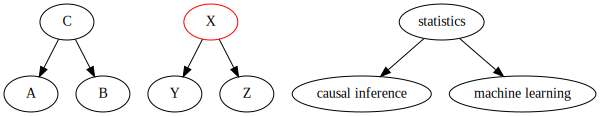

In [8]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", color="red")

g.edge("statistics", "causal inference")
g.edge("statistics", "machine learning")

g

예를 들어, 통계학에 대한 당신의 지식이 당신이 인과추론과 머신러닝에 대해 더 잘 알게하는 원인이 된다고 합시다. 만약 제가 당신의 통계학 지식의 수준에 대해 알지 못한다면, 당신이 인과 추론에 능하다는 것을 알면 당신이 기계학습에도 능할 가능성도 높여줍니다. 이는 내가 당신의 통계학 지식 수준을 모르더라도 당신의 인과추론 지식을 통해 그것을 추론할 수 있기 때문입니다. 만약 당신이 인과추론을 잘 안다면, 당신은 아마도 통계학도 잘 알 것이고,그럼 당신이 기계학습도 잘 알 가능성도 높은 것이죠. 

이제 만약 내가 당신의 통계학 지식에 대해 컨디셔닝을 하면, 당신이 머신러닝에 대해 얼마나 아는지는 당신이 인과추론에 대해 얼마나 아는지와 독립이 됩니다. 당신의 통계학 수준에 대해 아는 것이 당신의 기계학습 스킬 수준에 대해 추론하기 위해 필요한 모든 정보를 다 주었기 때문이죠.  당신의 인과추론 수준을 아는 것이 이 경우엔 추가적인 정보를 주지 않는다는 걸 알겠죠? 

일반적인 규칙으로서, 하나의 공통된 원인을 갖는 두 변수는 의존이지만, 우리가 공통의 원인을 컨디셔닝 하면 독립이 됩니다. 

혹은 $A \not \perp B$ 이고 $ A \perp B|C $로 나타낼 수 있습니다.

아직 다루지 않은 구조 하나는 collider 입니다. collider는 두 개의 화살표가 하나의 변수에서 충돌하는 경우입니다. 이 경우 우리는 두 변수가 같은 효과를 공유한다고 말할 수 있습니다. 

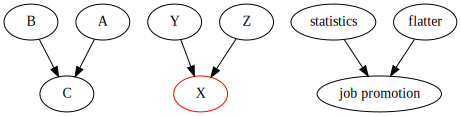

In [9]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", color="red")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

예를 들어, 우리가 승진하기 위한 두 개의 길이 있다고 칩시다. 통계학을 잘 하거나 당신 상사한테 아첨하는 것입니다. 만약 당신의 승진에 대해 컨디셔닝 하지 않는다면, 당신이 승진할지 아닐지 전혀 알 수 없고, 당신의 통계학 수준과 아첨하는 것은 독립이 됩니다. 다시 말해, 당신이 얼마나 통계학에 능한지를 아는 것은 당신이 상사한테 아첨을 얼마나 잘하는지에 대해 알려주는 바가 없습니다. 다른 한 편으로, 당신이 만약 승진했다면 갑자기 당신의 통계학 수준에 대해 아는 것은 당신의 아첨 수준에 대해서도 알려줍니다. 당신이 통계를 잘 못하는데 승진했다면, 당신은 아첨을 잘 하는 사람일 것입니다. 그렇지 않았으면 승진하지 못했을테니까요. 반대로 당신이 아첨을 잘 못한다면 당신은 통계는 잘할 것입니다. 이런 현상을 가끔 **explaining away**라고 부르는데, 왜냐하면 하나의 원인이 이미 효과에 대해 설명함으로써 다른 원인의 가능성을 줄이기 때문입니다. 

일반적인 규칙으로, collider에 대해 컨디셔닝 하는 것은 dependence path를 열어줍니다. 컨디셔닝을 하지 않는 것은 닫힌채로 두는 것이고요. 이는 $A \perp B$ 그리고 $A \not \perp B | C$ 로 나타낼 수 있습니다.

이 세 구조에 대해 앎으로써, 우리는 더 일반적인 규칙을 도출해낼 수 있습니다. 하나의 패스(path)를 막는 것은 다음 조건들의 필요충분 조건입니다. 
1. 패스에 컨디셔닝 할 수 있는 non collider가 포함된다
2. 패스에 아직 컨디셔닝 되지 않은 collider가 포함되고 컨디셔닝된 후손(descendants)을 가지지 않는다.

여기에 어떻게 그래프에서 의존성이 흐르는지에 대한 커닝 페이퍼가 있습니다. 이는 Mark Paskin의 [Stanford 발표](http://ai.stanford.edu/~paskin/gm-short-course/lec2.pdf)에서 가져왔습니다. 끝부분에 선이 그어진 화살표는 독립을 의미하고, 끝에 선이 없는 화살표는 의존을 의미합니다. 


[img]

마지막 예시로서, 다음의 인과 그래프에서 독립성과 의존성 관계를 찾아보세요.

1. Is $D \perp C $?
2. Is $D \perp C|A $?
3. Is $D \perp C|G $?
4. Is $A \perp F $?
5. Is $A \perp F|E $?
6. Is $A \perp F|E, C $?

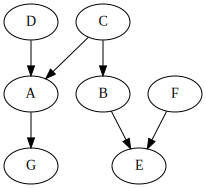

In [10]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")
g.edge("D", "A")
g.edge("B", "E")
g.edge("F", "E")
g.edge("A", "G")

g

**정답:**
    
1. $D \perp C $ 입니다. conditioned 되지 않은 collider를 가지고 있기 때문입니다. 
2. Is $D \not \perp C|A $ 입니다. conditioned된 collider를 가지고 있기 때문입니다.
3. Is $D \not \perp C|G $ 입니다. 
4. Is $A \perp F $?
5. Is $A \perp F|E $?
6. Is $A \perㅣp F|E, C $?